In [4]:
import xarray as xr
import numpy as np
import rioxarray

In [2]:
ds = xr.open_dataset('/home/fiona/test_era5/era5_surface_data_2015_test.nc')

In [9]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 34, longitude: 52, time: 24)
Coordinates:
  * longitude  (longitude) float32 2.064 2.3140197 ... 14.5649805 14.815
  * latitude   (latitude) float32 55.124 54.874 54.624 ... 47.374 47.124 46.874
  * time       (time) datetime64[ns] 2015-08-01 ... 2015-08-01T23:00:00
Data variables:
    sshf       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-26 13:23:47 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [8]:
ds.resample(time='1H', skipna=True).reduce(np.nanmean)

/home/fiona/anaconda3/envs/bird_vis/lib/python3.8/site-packages/xarray/core/variable.py:1535: RuntimeWarning: Mean of empty slice
  data = func(input_data, axis=axis, **kwargs)


<xarray.Dataset>
Dimensions:    (latitude: 34, longitude: 52, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2015-08-01 ... 2015-08-01T23:00:00
  * latitude   (latitude) float32 55.124 54.874 54.624 ... 47.374 47.124 46.874
  * longitude  (longitude) float32 2.064 2.3140197 ... 14.5649805 14.815
Data variables:
    sshf       (time, latitude, longitude) float32 nan nan ... -3577099.8
    sp         (time, latitude, longitude) float32 nan nan ... 89502.31 89623.48
    tp         (time, latitude, longitude) float32 nan nan ... 0.0010580588

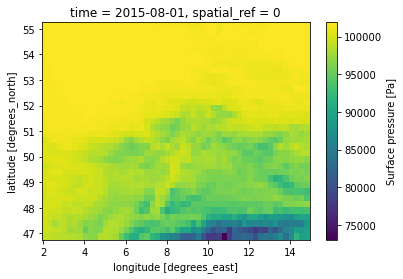

In [7]:
ds.sp.isel(time=0).rio.set_crs('EPSG:4326').rio.interpolate_na().plot()

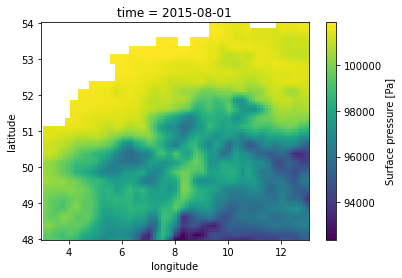

In [22]:
dsi = ds.sp.isel(time=0).interp(latitude = np.linspace(48, 54, 100), longitude = np.linspace(3, 13, 100), method='linear')
dsi.plot()

In [23]:
dsi = ds.interp(latitude = 51.156, longitude = 7.555, method='linear')

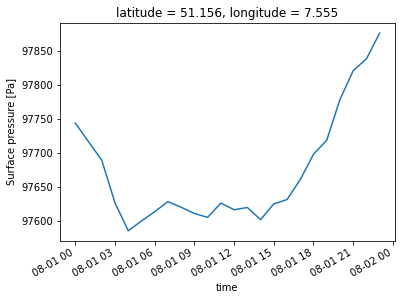

In [24]:
dsi.sp.plot()